In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import genpareto, kstest, genextreme
import numpy as np

In [9]:
df = pd.read_csv("C:/Users/casas/OneDrive/Uninorte/Projects/paper-energías/Filtrado/Boya Dibulla Filtrado.csv")

In [10]:
x = np.sort(df.swh.values)

In [11]:
def pot_probplot_gpd(x, q):
    u = np.quantile(x, q)
    y = x[x > u] - u
    params = genpareto.fit(y)
    Pmod = genpareto.cdf(y, *params)
    k = len(y)
    i = np.arange(1, k + 1)
    Pemp = i / (k + 1)
    ax = plt.subplot()
    ax.scatter(Pmod, Pemp, marker=".", color="k", s=0.05)
    ax.plot([0, 1], [0, 1], "r")
    ax.set_aspect('equal')
    ax.set_xlabel("Theoretical CDF")
    ax.set_ylabel("Empirical CDF")
    ax.set_title("P-P plot - GPD")
    return ax

In [16]:
def pot_probplot_gev(x, q):
    u = np.quantile(x, q)
    y = x[x > u]
    params = genextreme.fit(y)
    Pmod = genextreme.cdf(y, *params)
    k = len(y)
    i = np.arange(1, k + 1)
    Pemp = i / (k + 1)
    ax = plt.subplot()
    ax.scatter(Pmod, Pemp, marker=".", color="k", s=0.05)
    ax.plot([0, 1], [0, 1], "r")
    ax.set_aspect('equal')
    ax.set_xlabel("Theoretical CDF")
    ax.set_ylabel("Empirical CDF")
    ax.set_title("P-P plot - GEV Distribution")
    return ax

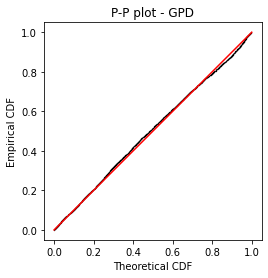

In [15]:
pot_probplot_gpd(x, 0.97);

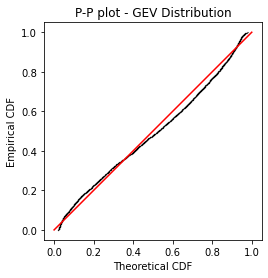

In [17]:
pot_probplot_gev(x, 0.97);

In [13]:
def pot_sse(x):
    qs = np.arange(0.9, 1, 0.01)
    es = []
    for q in qs:
        u = np.quantile(x, q)
        y = x[x > u] - u
        params = genpareto.fit(y)
        Pmod = genpareto.cdf(y, *params)
        k = len(y)
        i = np.arange(1, k + 1)
        Pemp = i / (k + 1)
        sse = np.sum((Pmod - Pemp)**2)
        #print(int(q * 100), sse)
        es.append(sse)
    return qs, np.array(es)

Text(0, 0.5, 'SSE')

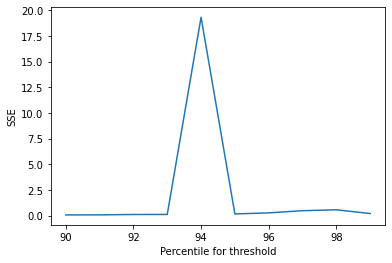

In [18]:
qs, es = pot_sse(x)
plt.plot(qs * 100, es)
plt.xlabel("Percentile for threshold")
plt.ylabel("SSE")